# PHYS2203 term paper simulation code

Pok Man (Adrian) Chow, University of Toronto

Simulation of two photon interference for Gaussian photons

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft

### 1. two photon interference dependence of beam splitter reflectance/transmittance

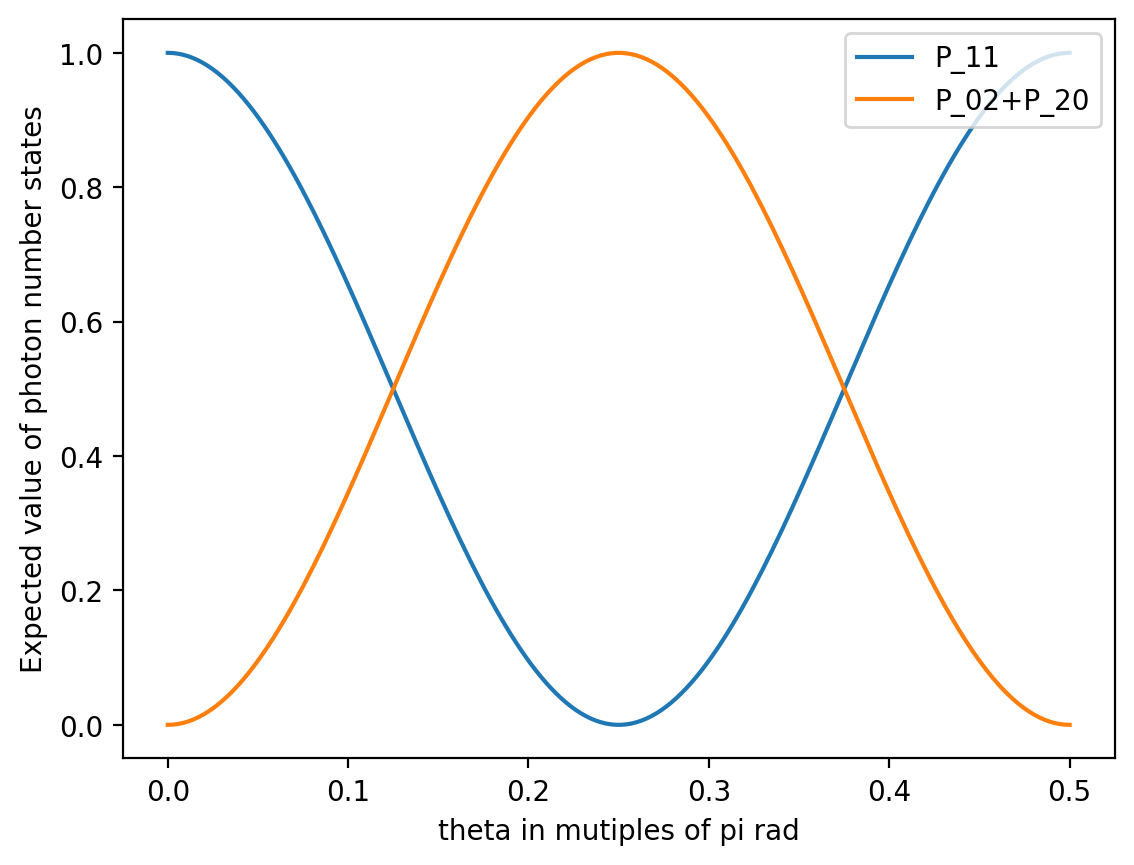

In [557]:
theta = np.linspace(0,1,num=180)*np.pi/2
state_11= (np.cos(theta)**(2) - np.sin(theta)**(2) )**2
state_02= 2*(np.cos(theta)**(2) * np.sin(theta)**(2) )
state_20= 2*(np.cos(theta)**(2) * np.sin(theta)**(2) )
plt.plot(theta/(np.pi),state_11,label="P_11")
plt.plot(theta/(np.pi),state_02+state_20,label="P_02+P_20")
plt.xlabel("theta in mutiples of pi rad")
plt.legend(loc='upper right')
plt.ylabel("Expected value of photon number states")
plt.show()

### 2. two photon interference dependence of phase difference

In [569]:
def N_3N_4(t,r,sigma_3,sigma_4,cen_w_3,cen_w_4):
    t_a = abs(t)
    r_a = abs(r)
    def _N_3N_4 (tau):

        return t_a**(4) + r_a**(4) - 4*r_a**(2)*t_a**(2)*( 
            sigma_3*sigma_4/(sigma_3**(2)+sigma_4**(2))*np.exp(
                - (sigma_3**(2)*sigma_4**(2)*tau**(2) + 
                   (cen_w_3 - cen_w_4)**2)/(sigma_3**2 + sigma_4**2)
                                                               )
        )
    
    return _N_3N_4

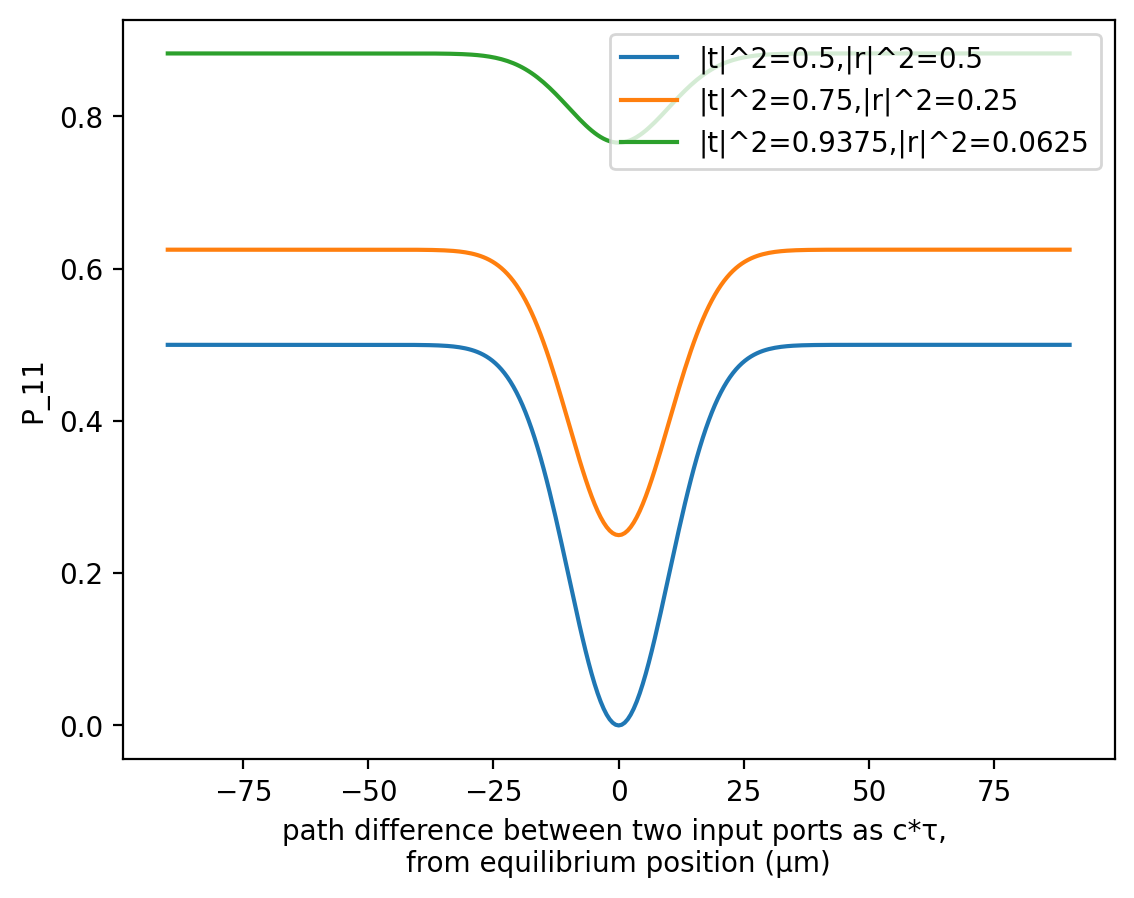

In [609]:
BS1 =  N_3N_4(t=np.sqrt(2)/2,r=np.sqrt(2)/2,sigma_3=3e13,sigma_4=3e13,cen_w_3=0,cen_w_4=0)
BS2 =  N_3N_4(t=np.sqrt(3)/2,r=1/2,sigma_3=3e13,sigma_4=3e13,cen_w_3=0,cen_w_4=0)
BS3 =  N_3N_4(t=np.sqrt(15)/4,r=1/4,sigma_3=3e13,sigma_4=3e13,cen_w_3=0,cen_w_4=0)
taus = np.linspace(-3,3,num=301)*1e-13
plt.plot(taus*3e8*1e6,BS1(taus),label="|t|^2=0.5,|r|^2=0.5")
plt.plot(taus*3e8*1e6,BS2(taus),label="|t|^2=0.75,|r|^2=0.25")
plt.plot(taus*3e8*1e6,BS3(taus),label="|t|^2=0.9375,|r|^2=0.0625")
plt.xlabel("path difference between two input ports as c*τ, \nfrom equilibrium position (μm)")
plt.legend(loc='upper right')
plt.ylabel("P_11")
plt.show()

### 3. two photon interference dependence of temporal profile

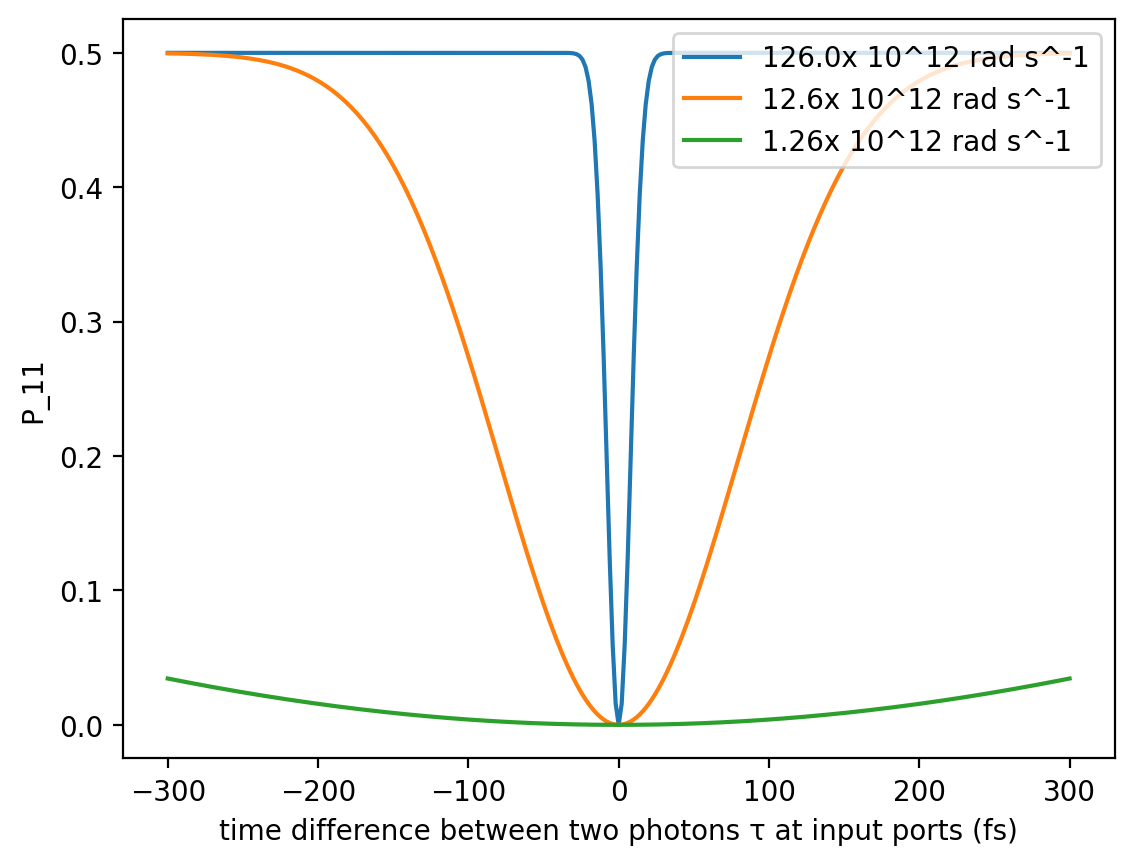

In [617]:
BSs = []
sigmas = np.array([12.6,1.26,0.126])*10e12
taus = np.linspace(-3,3,num=301)*1e-13
for i in sigmas:
    BS1 =  N_3N_4(t=np.sqrt(2)/2,r=np.sqrt(2)/2,sigma_3=i,sigma_4=i,cen_w_3=0,cen_w_4=0)
    BSs.append(BS1)
    plt.plot(taus*1e15,BS1(taus),label="{}x 10^12 rad s^-1".format(i/1e12))
plt.xlabel("time difference between two photons τ at input ports (fs)")
plt.legend(loc='upper right')
plt.ylabel("P_11")
plt.show()

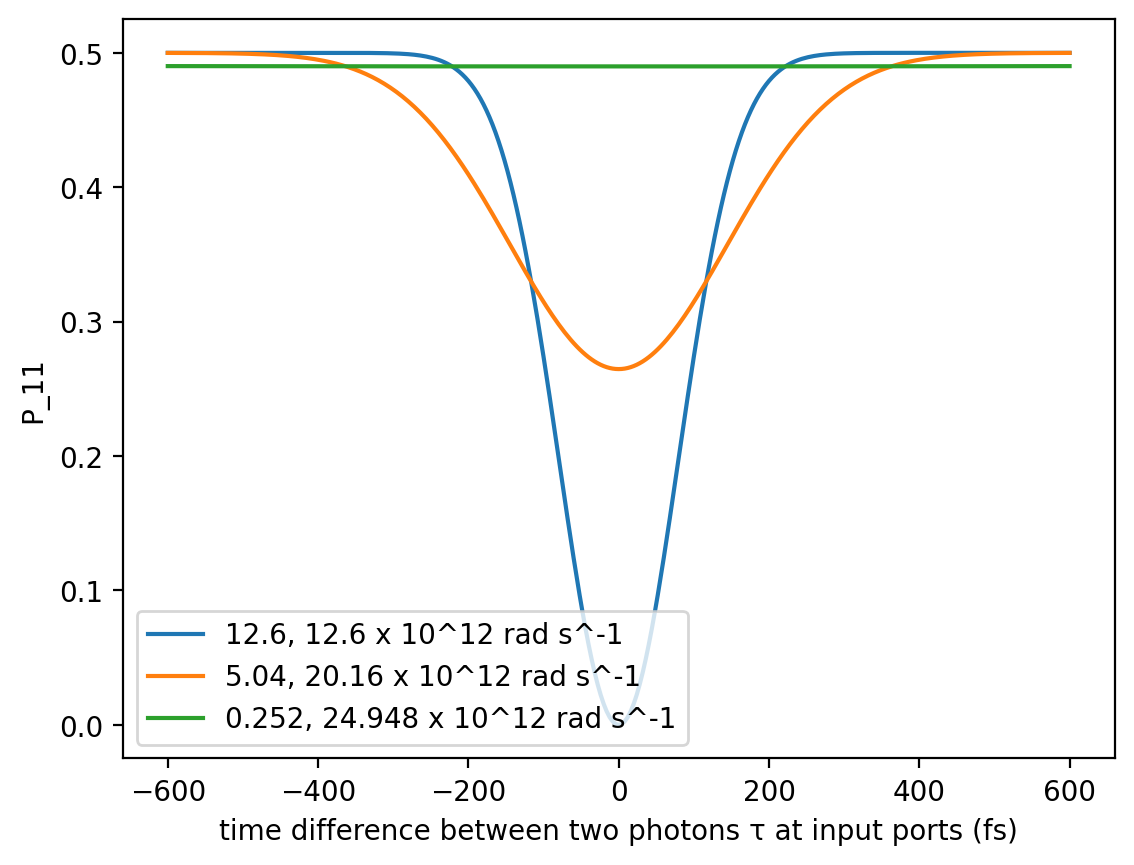

In [623]:
BSs = []
sigmas_3 = np.array([1.26,0.504,0.0252])*10e12
sigmas_4 = np.array([1.26,2.016,2.4948])*10e12
taus = np.linspace(-6,6,num=301)*1e-13
for i,j in zip(sigmas_3,sigmas_4):
    BS1 =  N_3N_4(t=np.sqrt(2)/2,r=np.sqrt(2)/2,sigma_3=i,sigma_4=j,cen_w_3=0,cen_w_4=0)
    BSs.append(BS1)
    plt.plot(taus*1e15,BS1(taus),label="{0}, {1} x 10^12 rad s^-1".format(i/1e12,j/1e12))
plt.xlabel("time difference between two photons τ at input ports (fs)")
plt.legend(loc='best')
plt.ylabel("P_11")
plt.show()

### 4. two photon interference dependence of central frequency

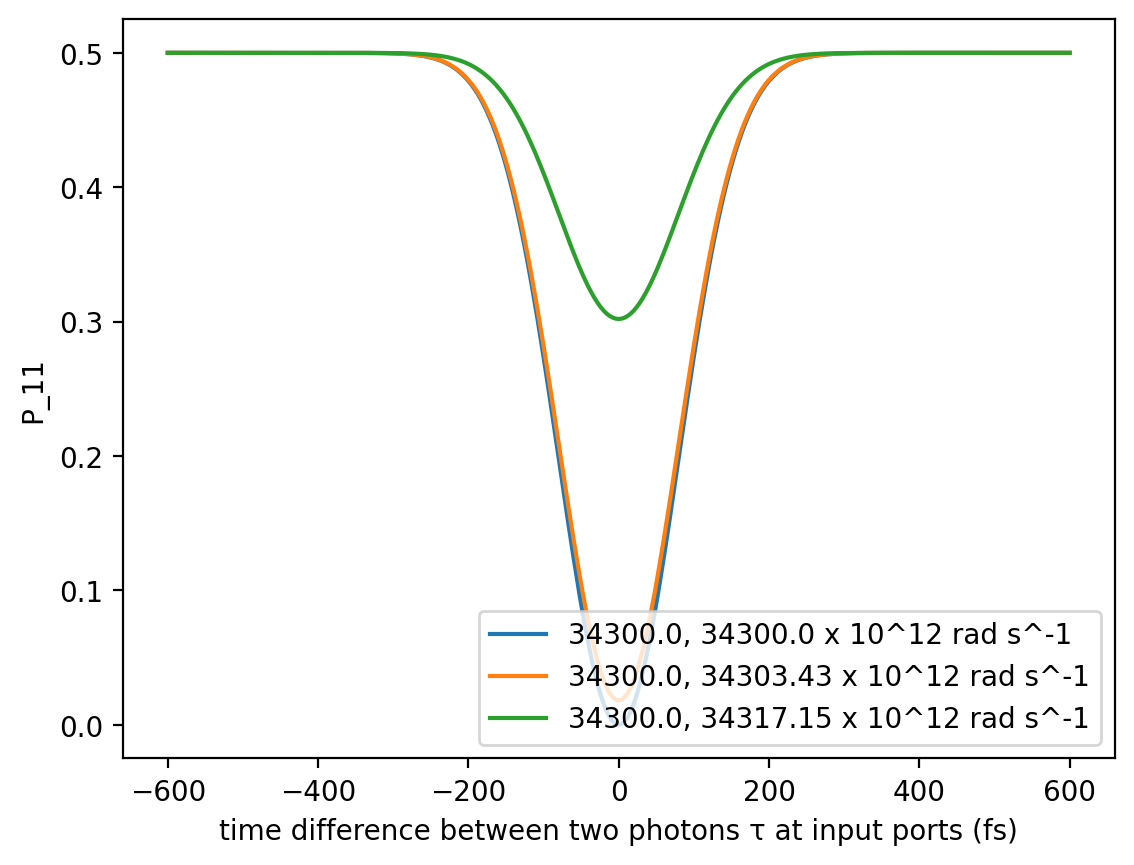

In [637]:
BSs = []
omega_3 = np.array([3.43,3.43,3.43])*10e15 #2pi*3*10^8 / 550nm
omega_4 = omega_3*np.array([1,1.0001,1.0005])
taus = np.linspace(-6,6,num=301)*1e-13
for i,j in zip(omega_3,omega_4):
    BS1 =  N_3N_4(t=np.sqrt(2)/2,r=np.sqrt(2)/2,sigma_3=1.26*10e12,sigma_4=1.26*10e12,cen_w_3=i,cen_w_4=j)
    BSs.append(BS1)
    plt.plot(taus*1e15,BS1(taus),label="{0}, {1} x 10^12 rad s^-1".format(i/1e12,j/1e12))
plt.xlabel("time difference between two photons τ at input ports (fs)")
plt.legend(loc='lower right')
plt.ylabel("P_11")
plt.show()